# Quantitative Finance with R

What are we going to learn today:
 - Introduction to R and Finance
 - Random Walks
 - Geometric Brownian Motion
 - Efficient Frontier
 - Portfolio Optimization
 - CAPM
 - Intraday Data

## Introduction to R and Finance
### Arithmetic expression and Standard Calculation

In [1]:
2 + 2

[1] 4

In [2]:
exp(-2)

[1] 0.1353353

In [3]:
pi

[1] 3.141593

In [4]:
cos(pi/3)

[1] 0.5

### Assignments

In [5]:
x<-2
y<-3
x + y

[1] 5

### Vectors in R


In [6]:
Nifty.50 <- c(8114.30, 7965.50, 8033.30, 8002.30, 7929.10 )
Nifty.50

[1] 8114.3 7965.5 8033.3 8002.3 7929.1

### Random Sample and graph

In [7]:
options(repr.plot.width=6, repr.plot.height=4)
r<-rnorm(n=1000,mean=0,sd=1)

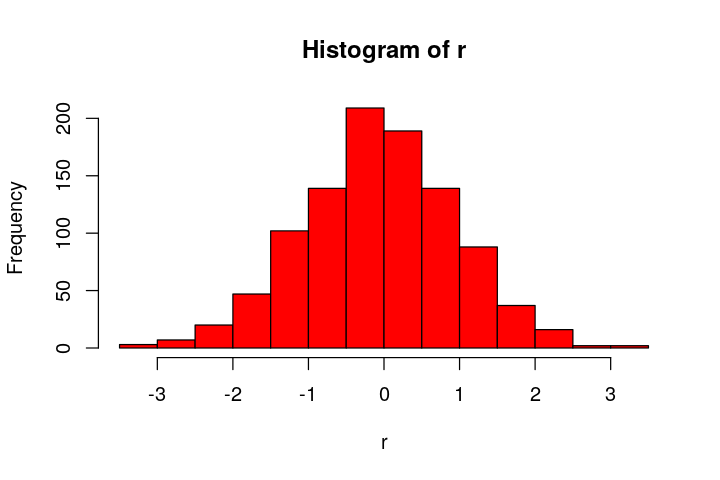

In [8]:
hist(r,col="red")

### Install Necessary Packages

In [9]:
install.packages(c("tseries", "xts", "zoo"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Dowload stock price data from Yahoo

In [10]:
library(tseries)
Nifty.50<-get.hist.quote(instrument = "^NSEI"
                         ,start="2016-11-21"
                         ,end="2016-11-25"
                         ,quote="AdjClose"
                         ,provider = "yahoo")

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



In [11]:
Nifty.50

           Adjusted
2016-11-21   7929.1
2016-11-22   8002.3
2016-11-23   8033.3
2016-11-24   7965.5
2016-11-25   8114.3

### Compute Log-return 

log-return is the consecutive differences of prices in log-scale, i.e.,
\begin{eqnarray*}
r_t &=& \log(P_t) - \log(P_{t-1})\\
&=& \log\Big(\frac{P_t}{P_{t-1}}\Big)
\end{eqnarray*}
where $P_t$ is the price of a stock (or value of an index) at time point $t$.

In [12]:
ln_rt<-diff(log(Nifty.50))
ln_rt  # log-return

               Adjusted
2016-11-22  0.009189427
2016-11-23  0.003866402
2016-11-24 -0.008475662
2016-11-25  0.018508197

### Compute Simple Return

Simple return can be calculated as 
\begin{eqnarray*}
R_t &=&\frac{P_t-P_{t-1}}{P_{t-1}}\\
 &=&\frac{P_t}{P_{t-1}}-1\\
 &=& e^{r_t}-1,
\end{eqnarray*}
where $r_t$ is the log-return

In [13]:
Rt<-exp(ln_rt)-1
Rt  # Simple return

               Adjusted
2016-11-22  0.009231780
2016-11-23  0.003873886
2016-11-24 -0.008439845
2016-11-25  0.018680535

In [14]:
Rt*100  # simple return in %

             Adjusted
2016-11-22  0.9231780
2016-11-23  0.3873886
2016-11-24 -0.8439845
2016-11-25  1.8680535

In [15]:
ln_rt*100

             Adjusted
2016-11-22  0.9189427
2016-11-23  0.3866402
2016-11-24 -0.8475662
2016-11-25  1.8508197

In [16]:
mean(ln_rt)

[1] 0.005772091

### Volatility (Standard Deviation)

In [17]:
sd(ln_rt)*100

[1] 1.126228

 - Volatility tells us, on average, how much value of an asset can go down or go up.
 - Since `sd(ln_rt)*100` is calculated using daily log-return; so calculated volatility is daily volatility in percentage.
 - So value of Nifty 50 can go down (or up) by `1.12623%` on a given day.


$K$-day volatility

\begin{eqnarray*}
\mathbb{E}(r_{t}(k))&=& k\mu,\\
\mathbb{V}ar(r_{t}(k))&=& k\sigma^2
\end{eqnarray*}

Therefore k-period volatility is $\sqrt{k}\sigma$

### Monthly volatility of Nifty 50

In [18]:
sqrt(22)*sd(ln_rt)*100

[1] 5.282477

### Yearly volatility of Nifty 50

In [19]:
sqrt(252)*sd(ln_rt)*100

[1] 17.87831

####  Why are we using $k$=22 and $k$=252 for monthly and yearly volatility of Nifty 50?